<div style="border:solid green 2px; padding: 20px">

<b>Привет, Владимир! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

# Содержание




**1 Изучение данных из файла**

    1.1 Информация о таблице data_user
    1.2 Информация о таблице data_rides
    1.3 Информация о таблице data_subscriptions
    1.4 Вывод

**2 Предобработка данных**

    2.1  Изменим тип данных в датафрейте для столбца 'date' , в датафреме 'data_rides'
    2.2  Создадим новый столбец в датафрейме 'data_rides'
    2.3  В пункте выше , мы получили информацию , что в датафрейме 'data_user' есть пропуски , удалим дубликаты.
    2.4  Вывод
    
**3 Исследовательский анализ данных**
    
    3.1 Постороим график какие города чаще всего встречаются в датафрейме 'data_user'
    3.2 Построим график в котором знаем соотношение пользователей с подпиской и без подписки
    3.3 Построим график , чтобы визуально увидеть возрат пользователей
    3.4 Построим график , чтобы визуализировать столбец 'distance' в датафрейме 'data_rides'
    3.5 Гисторамма продолжительности поездок в минутах
    3.6 Вывод
    
**4 Объединение данных**

    4.1 Объеденим два датафрейма 'data_user' и 'data_rides'
    4.2 Создадим новый датафрейм пользователи с подпиской
    4.3 Создадим новый датафрейм пользователи без подписки
    4.4 Постороим гистограмму(расстояние поездки пользователей без подписки)
    4.5 Постоим гистограмму(продолжительность поезди пользователей без подписки)
    4.6 Постороим гистограмму(расстояние поездок пользователей с подпиской)
    4.7 Постоим гистограмму(продолжительность поезди пользователей с подпиской)
    4.8 Вывод
    
**5 Подсчёт выручки**

    5.1 Округлим значения до целоги числа в столбце 'duration'
    5.2 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными
    5.3 Добавим в таблицу столбец с данными о месячной выручке для каждого пользователя по месяцам
    5.4 Вывод
    
**6 Проверка гипотез**

    6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу.
    6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
    6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
    6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
    6.5 Вывод
    
**7 Общий вывод**

In [1]:
from math import sqrt
from scipy import stats as st
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Шаг 1. Загрузка данных

In [2]:
data_user = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

<div class="alert alert-info"> <b>Перевел формат даты в параметре read_csv</b> 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Спасибо за параметр!
</div>

#### Информация о таблице data_user

In [3]:
data_user

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


In [4]:
data_user.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
data_user.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [7]:
data_user.duplicated().sum()

31

In [8]:
duplicated_df = data_user[data_user.duplicated()]
duplicated_df

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
И про дубликаты не забываешь, замечательно. Но действия по первичному анализу датафреймов схожи, можно было бы функцию написать 

##### В датафрейме 'data_user' есть в пропуски в количестве 31 строки . 

#### Информация о таблице data_rides

In [9]:
data_rides

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


In [10]:
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [11]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [12]:
#data_rides.isna().sum()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
`isnа` частично дублирует информацию `info`, поэтому в принципе его можно опустить

</div>

In [13]:
data_rides.duplicated().unique()

array([False])

#### Информация о таблице data_subscriptions

In [14]:
data_subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [15]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [16]:
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [17]:
data_subscriptions.duplicated().unique()

array([False])

#### Вывод :<br/> В данном пункте , мы прочитали три датафрейма. Получили информацию по всем трем таблицам. В датафрейме 'data_user' оказались пропуски в количестве 31й строки . В предобработке данных удалим дубликаты.

### Шаг 2. Предобработка данных

#### Изменим тип данных в датафрейте для столбца 'date' , в датафреме 'data_rides'

data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides.info()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
У `read_csv` есть параметр, который позволяет даты сразу в нужный формат переводить, рекомендую к использованию  </div>

#### Создадим новый столбец в датафрейме 'data_rides' 

In [18]:
data_rides['month'] = data_rides['date'].dt.month
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


#### В пункте выше , мы получили информацию , что в датафрейме 'data_user' есть пропуски , удалим дубликаты.

In [19]:
data_user = data_user.drop_duplicates()
data_user.duplicated().sum()


0

#### Вывод:<br/> Дубликаты удалены. Т.к дубликаты были с 1533 по 1564 строку по порядку , можно не сбрасывать индексы. Был создан столбец в датафрейме 'data_rides'. В этом же датафрейме столбец 'date' был переведен в формат 'datetime64'.

### Шаг 3. Исследовательский анализ данных

#### Постороим график какие города чаще всего встречаются в датафрейме 'data_user' 

In [20]:
data_user['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

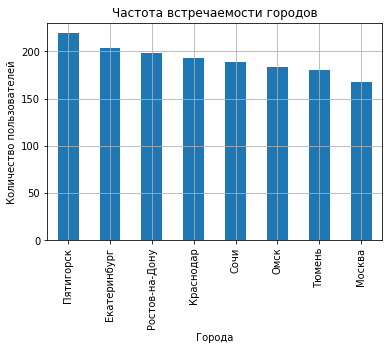

In [21]:
data_user['city'].value_counts().plot(kind='bar', grid=True)
plt.title('Частота встречаемости городов')
plt.xlabel('Города')
plt.ylabel('Количество пользователей')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Отлично!

</div>

<div class="alert alert-info"> <b>Вывел абсолютрое число. Дополнительно постоил график. Исправил вывод</b>

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Здесь хотелось видеть абсолютное число пользователей по городам численно, просто вывод `value_counts`

</div>

##### В данном графике мы видим , что больше всего пользователей сервиса аренды самокатов GoFast находится в городе Пятигорск ( 219 аренд), следом идут Екатеринбург и Ростов-на-Дону (204 и 198 соответственно). Меньше всего берут самокаты в аренду в городах Тюмень и Москва ( 180 и 168 аренд соответственно)

####  Построим график в котором знаем соотношение пользователей с подпиской и без подписки

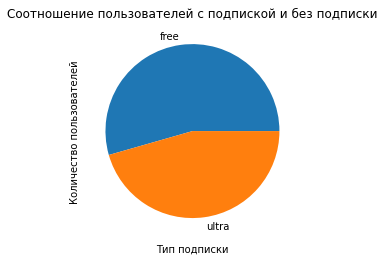

In [22]:
data_user['subscription_type'].value_counts().plot(kind='pie', grid=True)
plt.title('Cоотношение пользователей с подпиской и без подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Для разнообразия можно было бы строить круговую диаграмму

##### На графике видно что большинство пользователей пользуються сервисом без подписки

#### Построим график , чтобы визуально увидеть возрат пользователей

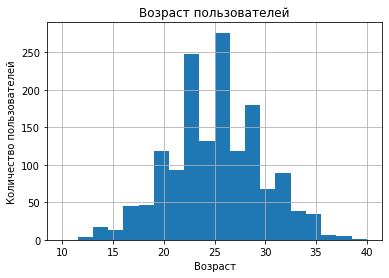

In [23]:
data_user['age'].hist(bins=20, range=(10, 40))
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

##### Большиство арендаторов самокатов в возрасте от 22 до 30 лет 

#### Построим график , чтобы визуализировать столбец  'distance'  в датафрейме 'data_rides'

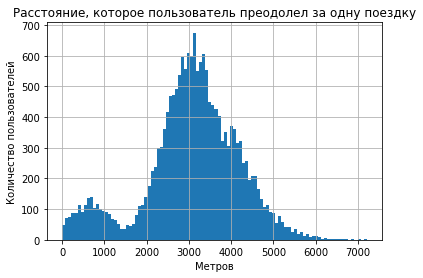

In [24]:
data_rides['distance'].hist(bins=100)
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Метров')
plt.ylabel('Количество пользователей')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Наличие пары пиков дистанций наталкивает на мысль, что может быть несколько сценариев пользования приложением и с этими категориями стоит отдельно работать

##### В гистограмме видно , что большее количество пользователей проезжают расстояние от 2000 до 4500 метров. 

#### Гисторамма продолжительности поездок в минутах

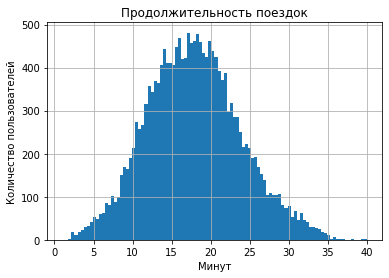

In [25]:
data_rides['duration'].hist(bins=100 , range=(1,40))
plt.title('Продолжительность поездок')
plt.xlabel('Минут')
plt.ylabel('Количество пользователей')
plt.show()

##### От 10 до 25 минут самые часто встречаемое время поездок. Также обратим внимание на минимальное значение . 

<div class="alert alert-info"> <b>Убрал строки с минимальными значениями. Исправил вывод</b>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Было бы хорошо посмотреть на дистанцию сверх коротких по времени поездок, там есть кое-что интересное
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Красным, так как критически хочу обратить внимание на этот аспект.
    
Генерировать гипотезы, которые объясняют закономерности, аномалии - отличное стремление. Но если то, что ты предполагаешь можно проверить по имеющимся данным, то лучше сначала проверять, а потом утверждать, чтобы не подталкивать к неверным выводам.


Здесь это про расстояние крайне коротких по времени поездок
</div>

#### Вывод :<br/>Мы построили графики для пяти столбцов двух датайфеймов:<br/>data_rides(duration , distance)data_user(age , subscription_type, city)<br/>В текущем разделе мы узнали в каких городах арендуют самокаты чаще всего (Пятигорск , Екатеринбург и Ростов-на-Дону).<br/> Узнали , что пользователей без подписки больше чем с подпиской(~830 и 700). Большиство арендаторов самокатов в возрасте от 22 до 30 лет . Большее количество пользователей проезжают расстояние от 2000 до 4500 метров. От 10 до 25 минут самые часто встречаемое время поездок .

### Шаг 4. Объединение данных

#### Объеденим два датафрейма 'data_user' и 'data_rides'

In [26]:
data_data = data_user.merge(data_rides, on='user_id', how='left').merge(data_subscriptions, on ='subscription_type' , how='left')
data_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [27]:
data_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

<div class="alert alert-info"> <b>+</b>

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу ещё добавить проверку, что после соединения таблиц не возникли пропуски, что размер объъединенной таблице соответствует ожиданиям

</div>

##### Произвел объединение  датафреймов методом merge по столбцу 'user_id'  и 'subscription_type'

#### Создадим новый датафрейм пользователи с подпиской

In [28]:
data_with_sub = data_data[(data_data['subscription_type'] == 'ultra')]
data_with_sub

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


##### Создал датафрейм с информацией о пользователях с подпиской 

#### Создадим новый датафрейм пользователи без подписки

In [29]:
data_without_sub = data_data[(data_data['subscription_type'] == 'free')]
data_without_sub

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


##### Создал датафрейм с информацией о пользователях без подписки 

#### Постоим совместную гистограмму(продолжительность поезди пользователей с подпиской и без)

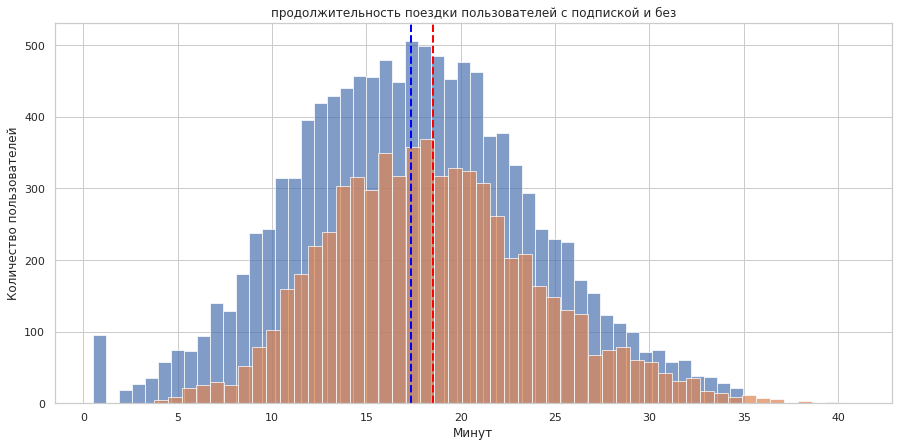

In [30]:
data_wo = data_without_sub['duration']
data_w = data_with_sub['duration']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
plt.hist(data_wo, bins = 50, alpha=0.7, label='продолжительность поезди пользователей без подписки')
plt.hist(data_w, bins = 50,alpha=0.7, label='продолжительность поезди пользователей с подпиской')
plt.axvline(np.mean(data_wo), color='blue', linestyle='dashed', linewidth=2, label=f'Среднее без подписки: {np.mean(data_wo):.2f}')
plt.axvline(np.mean(data_w), color='red', linestyle='dashed', linewidth=2, label=f'Среднее с подпиской: {np.mean(data_w):.2f}')
plt.title('продолжительность поездки пользователей с подпиской и без')
plt.xlabel('Минут')
plt.ylabel('Количество пользователей')
#plt.legend()
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Подписи и на легенду добавлены и конкретные значения подписаны - восторг 
</div>

#### Постоим совместную гистограмму(расстояние поезди пользователей с подпиской и без)

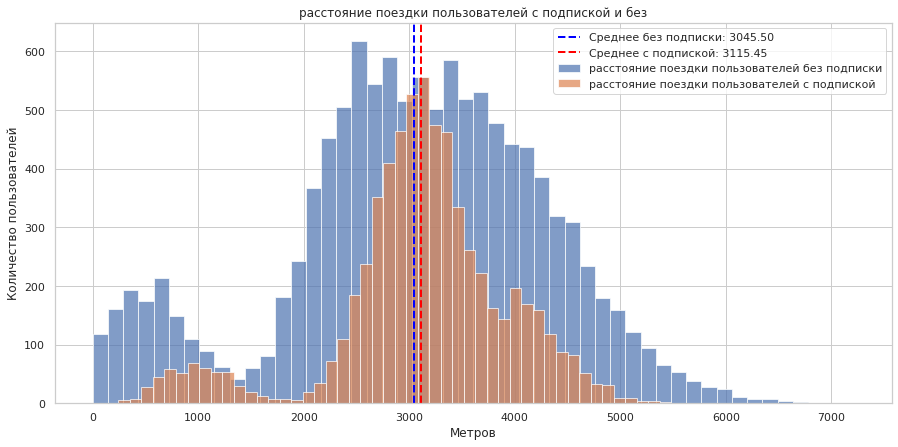

In [31]:
data_wos = data_without_sub['distance']
data_ws = data_with_sub['distance']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
plt.hist(data_wos, bins = 50, alpha=0.7, label='расстояние поездки пользователей без подписки')
plt.hist(data_ws, bins = 50,alpha=0.7, label='расстояние поездки пользователей c подпиской')
plt.axvline(np.mean(data_wos), color='blue', linestyle='dashed', linewidth=2, label=f'Среднее без подписки: {np.mean(data_wos):.2f}')
plt.axvline(np.mean(data_ws), color='red', linestyle='dashed', linewidth=2, label=f'Среднее с подпиской: {np.mean(data_ws):.2f}')
plt.title('расстояние поездки пользователей с подпиской и без')
plt.xlabel('Метров')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Проще сравнивать распределения на одном графике, поэтому рекомендовал бы продолжительность двух категорий расположить на одном графике, аналогично с расстоянием
* На графиках отлично смотрится среднее или медиана, как дополнительное опорной значение, вот [тут](https://stackoverflow.com/questions/16930328/vertical-horizontal-lines-in-matplotlib) можно посмотреть, как добавить такую визуализацию

<div class="alert alert-info"> <b>+</b>

#### Вывод:<br/> Глядя на гистораммы , можно сделать вывод , что разница во времени поездок и расстояниий которые проехали  пользователи сервиса с подпиской и без подписки не большая . Но т.к пользователей без подписки в два раза больше , значения могум сильно отличаться.

### Шаг 5. Подсчёт выручки

#### Округлим  значения до целоги числа в столбце 'duration'

In [32]:
data_data['duration'] = np.ceil(data_data['duration']).astype(int)

#### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными

In [33]:
data_agg = data_data.pivot_table(index=['user_id','month'],
                                  values = ['name','distance', 'duration','subscription_type','subscription_fee',
                                            'minute_price', 'start_ride_price'],
                                  aggfunc = {'duration': sum,
                                             'distance': sum, 
                                             'name' : len,
                                             'minute_price' : max,
                                             'subscription_type' : max,
                                             'start_ride_price' : max,
                                             'subscription_fee' : max})
        
data_agg.head()

distance  duration  minute_price  name  start_ride_price  \
user_id month                                                                
1       1      7027.511294        42             6     2                 0   
        4       754.159807         7             6     1                 0   
        8      6723.470560        46             6     2                 0   
        10     5809.911100        32             6     2                 0   
        11     7003.499363        56             6     3                 0   

               subscription_fee subscription_type  
user_id month                                      
1       1                   199             ultra  
        4                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        11                  199             ultra

##### В данной таблице объеденились данные 'distance'  и 'duration' по месяцам

#### Добавим в таблицу столбец с данными о  месячной выручке для каждого пользователя по месяцам

In [34]:
data_agg['cash_month'] = (data_agg['start_ride_price']*data_agg['name']+data_agg['minute_price']* \
                          data_agg['duration']+data_agg['subscription_fee'])
data_agg.head(20)
                        

distance  duration  minute_price  name  start_ride_price  \
user_id month                                                                 
1       1       7027.511294        42             6     2                 0   
        4        754.159807         7             6     1                 0   
        8       6723.470560        46             6     2                 0   
        10      5809.911100        32             6     2                 0   
        11      7003.499363        56             6     3                 0   
        12      6751.629942        28             6     2                 0   
2       3      10187.723006        63             6     3                 0   
        4       6164.381824        40             6     2                 0   
        6       3255.338202        14             6     1                 0   
        7       6780.722964        48             6     2                 0   
        8        923.007439         7             6     1                 0   
        10      2824.636598        19             6     1                 0   
        12      3828.248580        12             6     1                 0   
3       1       3061.777147        13             6     1                 0   
        2       5421.152016        39             6     2                 0   
        4       2956.651632        21             6     1                 0   
        5       9064.026918        63             6     3                 0   
        7      10919.595403        67             6     3                 0   
        9       2891.012822        23             6     1                 0   
        12      2593.381928        13             6     1                 0   

               subscription_fee subscription_type  cash_month  
user_id month                                                  
1       1                   199             ultra         451  
        4                   199             ultra         241  
        8                   199             ultra         475  
        10                  199             ultra         391  
        11                  199             ultra         535  
        12                  199             ultra         367  
2       3                   199             ultra         577  
        4                   199             ultra         439  
        6                   199             ultra         283  
        7                   199             ultra         487  
        8                   199             ultra         241  
        10                  199             ultra         313  
        12                  199             ultra         271  
3       1                   199             ultra         277  
        2                   199             ultra         433  
        4                   199             ultra         325  
        5                   199             ultra         577  
        7                   199             ultra         601  
        9                   199             ultra         337  
        12                  199             ultra         277

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Абсолютно верный расчёт доходов, можно двигаться к проверке гипотез

In [35]:
data_agg['cash_month'].sum()

3878641

#### Вывод:<br/> Добавили в таблицу данные о выручке . Также вывел на экран суммарный заработок с пользователей. Округлили значения до целого числа в столбце 'duration' . Создал сводную таблицу , состоящую из :distance,	duration,	minute_price,	name,	start_ride_price,	subscription_fee,	subscription_type

### Шаг 6. Проверка гипотез

#### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу.

H0 - пользователи с подпиской , тратят столько же времени на поездки , сколько и пользователи без подписки

H1 - пользователи с подпиской тратят больше времени

In [36]:
dur_ws = data_with_sub['duration']
dur_wos = data_without_sub['duration']

alpha = 0.05
results = st.ttest_ind(dur_ws,
                       dur_wos,
                       alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print(f'Среднее без рекламы: {np.mean(dur_wos):.2f}')
print(f'Среднее с рекламой: {np.mean(dur_ws):.2f}')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу
Среднее без рекламы: 17.39
Среднее с рекламой: 18.54


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отлично, что формулируешь нулевую, альтернативную гипотезу, это важно, выводы верны, ещё могу порекомендовать дополнительно проверять себя и выводить среднее проверяемых переменных или распределения

<div class="alert alert-info"> <b>+</b>

#####  Пользователи с подпиской тратят больше времени на поездки . Н1 верна

#### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Н0 - Среднее расстояние равно 3130 метров

Н1 - Среднее расстояние больше 3130 метров

In [37]:
mean_dist = 3130
alpha = 0.05 
results = st.ttest_1samp(
    data_with_sub['distance'],
    mean_dist,
    alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


In [38]:
data_with_sub['distance'].mean()

3115.4453880370247

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Бизнес может спать спокойно, с износом всё в порядке

##### Судя по результату ttest'a , можно считать , что среднее расстояние равно 3130 метров

#### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Н0 - выручка пользователей с подпиской и без подписки равна

Н1 - выручка поользователей с подпиской больше выручки пользователей без подписки

In [39]:
ultra = data_agg.loc[data_agg['subscription_type'] == 'ultra', 'cash_month']
free = data_agg.loc[data_agg['subscription_type'] == 'free','cash_month']

alpha = 0.05
results = st.ttest_ind(
    ultra,
    free,
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print(f'Среднее без подписки: {np.mean(free):.2f}')
print(f'Среднее с подпиской: {np.mean(ultra):.2f}')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу
Среднее без подписки: 328.64
Среднее с подпиской: 362.79


##### Результат теста дает нам  понять , что пользователи с подпиской приносят больше денег

####  Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для данной задачи , я бы использовал ttest_rel(Гипотеза о равенстве средних для зависимых (парных) выборок). В случае с данной задачей до и после обновления

Гипотезы в таком случае будут сформулированы так: 

H0 - before = after

H1 - before > after

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Отлично, удачи в дальнейшем обучении!)
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Как выделенные слова влияют на формулировку гипотез? 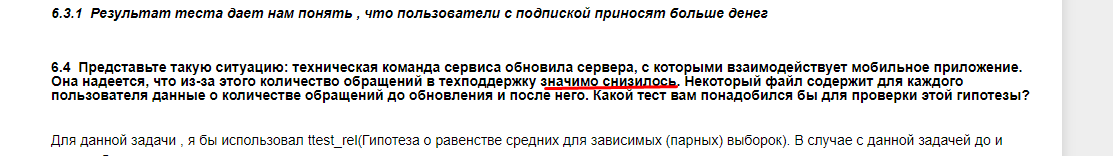
</div>

#### Вывод:<br/> В данном разделе провели 3 теста , для 3х разных ситуаций. Дважды воспользовались ttest_ind(О равенстве средних двух генеральных совокупностей) и ttest_1samp(О равенстве среднего генеральной совокупности числу) . <br/> В итоге получили , что в первой в третьей задаче , где использовался ttest_ind пришлось отвергнуть нулевую гипотезу . Во второй задаче с методом ttest_1samp не пришлось отвергать нулевую гипотезу.<br/> В четвертой задаче нам надо было определись какой лучше тест истользовать . Для данной задачи , я бы использовал ttest_rel(Гипотеза о равенстве средних для зависимых (парных) выборок)

### Общий вывод:<br/><br/> В данном проекте по статистическому анализу данных , были выполнены следующие работы:<br/><br/>- была изучена информация по трем датафреймам(data_user, data_rides, data_subscriptions)<br/><br/>- Приведен столбец date к типу даты pandas(datetime64)<br/><br/>-Создан новый столбец с номером месяца на основе столбца date.<br/><br/>-Проверены датайреймы на наличие дубликатов . В последствии удалены<br/><br/>-Описаны и визуализированы :<br/><br/>Частота встречаемости городов(3.1).Пятигорск чаще остальных встречается<br/><br/>Соотношение пользователей с подпиской и без подписки(3.2).Пользователей без подписки оказалось больше.<br/><br/>Возраст пользователей(3.3).Большиство арендаторов самокатов в возрасте от 22 до 30 лет<br/><br/>Расстояние, которое пользователь преодолел за одну поездку(3.4).Большее количество пользователей проезжают расстояние от 2000 до 4500 метров<br/><br/>Продолжительность поездок(3.5).От 10 до 25 минут самые часто встречаемое время поездок.<br/><br/>-Были объеденены 3 датафрема методом *merge*<br/><br/>-Созданы отдельные датафреймы для пользователей без подписки(data_without_sub) и с  подпиской(data_with_sub)<br/><br/>-Созданы объединенные диаграммы(расстояние поезди пользователей с подпиской и без (4.5))(продолжительность поезди пользователей с подпиской и без (4.4))<br/><br/>-Создан датайрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными в data_agg содержащий следующие столбцы(user_id, month, distance, duration,	minute_price, name,	start_ride_price, subscription_fee,	subscription_type)<br/><br/>-Округлил данный столбца (duration) до целоги числа(22.6->23)<br/><br/>-В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь(cash_month)<br/><br/>-Также узнали общую выручку , которая составила - 3878641р.<br/><br/>- В 6 разделе предстояло определись каким тестом стоило воспользоваться в задчах. В двух задачах использовали ttest_ind ,  по одному разу пришлось использовать ttest_rel и ttest_1samp.<br/><br/>-Для каждого раздела сыли сделаны выводы

### Шаг 7. Распределения